In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
data= pd.read_csv('mktmix.csv')

In [3]:
data.head()

,NewVolSales,Base_Price,Radio,InStore,NewspaperInserts,Discount,TV,Stout,Website_Campaign
0,19564,15.029276,245.0,15.452,NaN,0.000,101.780000,2.28342,NaN
1,19387,15.029276,314.0,16.388,NaN,0.000,76.734000,2.22134,NaN
2,23889,14.585093,324.0,62.692,NaN,0.050,131.590200,2.00604,NaN
3,20055,15.332887,298.0,16.573,NaN,0.000,119.627060,2.19897,NaN
4,20064,15.642632,279.0,41.504,NaN,0.045,103.438118,1.81860,NaN


In [4]:
data.shape

(104, 9)

In [6]:

pd.options.display.float_format = '{:.2f}'.format
data.describe()

,NewVolSales,Base_Price,Radio,InStore,Discount,TV,Stout
count,104.00,104.00,100.00,104.00,104.00,104.00,104.00
mean,20171.07,15.31,256.69,32.92,0.02,141.01,2.55
std,1578.60,0.53,86.99,13.68,0.03,42.95,0.31
min,17431.00,13.74,0.00,10.78,0.00,37.66,1.82
25%,19048.75,15.03,235.00,22.18,0.00,117.11,2.32
50%,19943.50,15.33,278.50,31.16,0.00,138.58,2.50
75%,20942.75,15.64,313.25,41.08,0.05,175.68,2.81
max,24944.00,16.28,399.00,68.12,0.09,240.29,3.16


In [7]:
data.columns

Index(['NewVolSales', 'Base_Price', 'Radio ', 'InStore', 'NewspaperInserts',
       'Discount', 'TV', 'Stout', 'Website_Campaign '],
      dtype='object')

In [14]:
data.dtypes

NewVolSales            int64
Base_Price           float64
Radio                float64
InStore              float64
NewspaperInserts      object
Discount             float64
TV                   float64
Stout                float64
Website_Campaign      object
dtype: object

In [17]:
data.rename(columns={'Website_Campaign ':'Website_Campaign','Radio ':'Radio'},inplace=True)
data.columns

Index(['NewVolSales', 'Base_Price', 'Radio', 'InStore', 'NewspaperInserts',
       'Discount', 'TV', 'Stout', 'Website_Campaign'],
      dtype='object')

In [18]:
data['Website_Campaign'].unique()

array([nan, 'Facebook', 'Twitter', 'Website Campaign '], dtype=object)

In [20]:
#cleaning the data values

data['Website_Campaign'] =np.where((data['Website_Campaign']=='Website Campaign'),
                                  'Website Campaign',data['Website_Campaign'])

In [24]:
data['Base_Price'].describe()

#the data here is a little skewed
#skewed to the left

count   104.00
mean     15.31
std       0.53
min      13.74
25%      15.03
50%      15.33
75%      15.64
max      16.28
Name: Base_Price, dtype: float64

<AxesSubplot:ylabel='Frequency'>

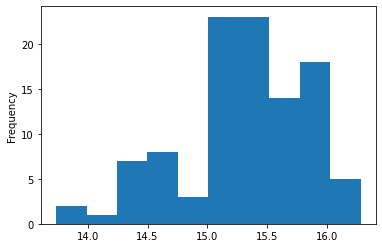

In [23]:
data['Base_Price'].plot(kind='hist')

<AxesSubplot:>

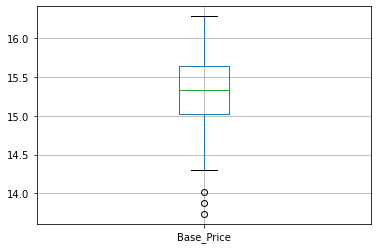

In [27]:
data.boxplot(column='Base_Price')

In [28]:
data['Base_Price'].quantile(np.arange(0,1,0.1))

0.00   13.74
0.10   14.59
0.20   14.97
0.30   15.03
0.40   15.18
0.50   15.33
0.60   15.49
0.70   15.64
0.80   15.80
0.90   15.96
Name: Base_Price, dtype: float64

In [30]:
q = data['Base_Price'].quantile(0.01)
q
#here any value less than q maybe the outliners

13.8779529113

In [31]:
data[data['Base_Price']<q]

,NewVolSales,Base_Price,Radio,InStore,NewspaperInserts,Discount,TV,Stout,Website_Campaign
74,24468,13.74,251.00,37.84,NaN,0.05,135.15,2.66,NaN
76,21710,13.87,261.00,34.22,NaN,0.00,148.71,2.98,NaN


In [33]:
#here we dont see much outliners but still we replace this value with avg(base price)

avg=data['Base_Price'].mean()

data.loc[(data['Base_Price']<q),'Base_Price']=avg

In [34]:
data['Base_Price'].describe()

count   104.00
mean     15.34
std       0.48
min      14.01
25%      15.03
50%      15.33
75%      15.64
max      16.28
Name: Base_Price, dtype: float64

In [35]:
data['NewVolSales'].describe()

count     104.00
mean    20171.07
std      1578.60
min     17431.00
25%     19048.75
50%     19943.50
75%     20942.75
max     24944.00
Name: NewVolSales, dtype: float64

<AxesSubplot:ylabel='Frequency'>

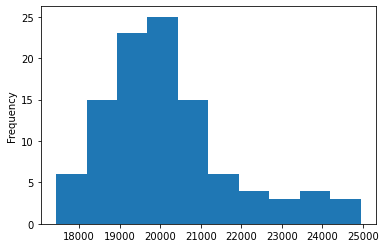

In [37]:
#even though there is postive skewness
#here this is the target column hence we dont deal with the outliers

data['NewVolSales'].plot(kind='hist')

In [38]:
data['Radio'].describe()

count   100.00
mean    256.69
std      86.99
min       0.00
25%     235.00
50%     278.50
75%     313.25
max     399.00
Name: Radio, dtype: float64

In [39]:
data['Radio'].isnull().sum()

4

In [40]:
data['Radio']=data['Radio'].fillna(data['Radio'].mean())

In [41]:
data['Radio'].describe()

count   104.00
mean    256.69
std      85.29
min       0.00
25%     235.75
50%     276.00
75%     312.25
max     399.00
Name: Radio, dtype: float64

In [43]:
data['Website_Campaign'].value_counts(dropna=False)

NaN                  90
Website Campaign      6
Twitter               4
Facebook              4
Name: Website_Campaign, dtype: int64

<AxesSubplot:xlabel='NewVolSales', ylabel='Base_Price'>

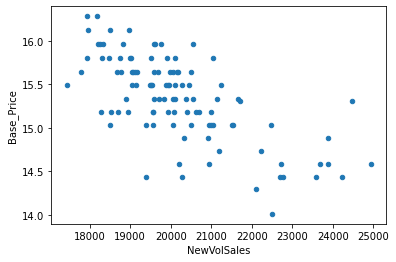

In [44]:
data.plot(x='NewVolSales',y='Base_Price',kind='scatter')

<AxesSubplot:xlabel='NewVolSales', ylabel='Radio'>

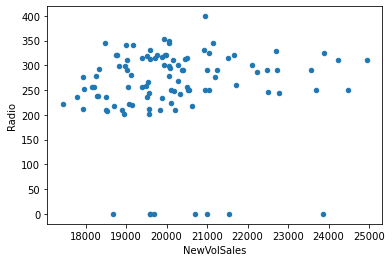

In [45]:
data.plot(x='NewVolSales',y='Radio',kind='scatter')

In [47]:
data.corr()

,NewVolSales,Base_Price,Radio,InStore,Discount,TV,Stout
NewVolSales,1.00,-0.68,0.05,0.44,0.42,0.15,-0.38
Base_Price,-0.68,1.00,-0.00,-0.24,-0.20,0.07,0.02
Radio,0.05,-0.00,1.00,-0.02,0.11,-0.06,-0.19
InStore,0.44,-0.24,-0.02,1.00,0.72,-0.02,0.03
Discount,0.42,-0.20,0.11,0.72,1.00,0.12,-0.03
TV,0.15,0.07,-0.06,-0.02,0.12,1.00,-0.13
Stout,-0.38,0.02,-0.19,0.03,-0.03,-0.13,1.00


<AxesSubplot:>

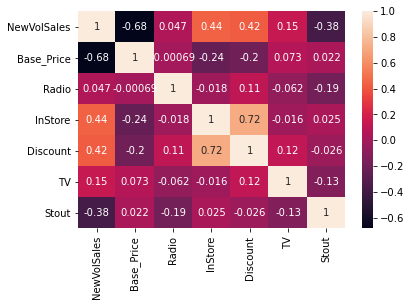

In [48]:
sns.heatmap(data.corr(),annot=True)

In [56]:
data.columns

Index(['NewVolSales', 'Base_Price', 'Radio', 'InStore', 'Discount', 'TV',
       'Stout', 'NewspaperInserts_Insert', 'Website_Campaign_Facebook',
       'Website_Campaign_Twitter', 'Website_Campaign_Website Campaign '],
      dtype='object')

In [57]:
data.head()

,NewVolSales,Base_Price,Radio,InStore,Discount,TV,Stout,NewspaperInserts_Insert,Website_Campaign_Facebook,Website_Campaign_Twitter,Website_Campaign_Website Campaign
0,19564,15.03,245.00,15.45,0.00,101.78,2.28,0,0,0,0
1,19387,15.03,314.00,16.39,0.00,76.73,2.22,0,0,0,0
2,23889,14.59,324.00,62.69,0.05,131.59,2.01,0,0,0,0
3,20055,15.33,298.00,16.57,0.00,119.63,2.20,0,0,0,0
4,20064,15.64,279.00,41.50,0.04,103.44,1.82,0,0,0,0


In [58]:
data['NewspaperInserts_Insert'].value_counts()

0    98
1     6
Name: NewspaperInserts_Insert, dtype: int64

In [ ]:
#here to convert categorical to numerical we use dummies to give value
# another thing that we use is Label encoding
#but in label encoding priority is given to the values
#hence it is good to use dummies


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   NewVolSales                         104 non-null    int64  
 1   Base_Price                          104 non-null    float64
 2   Radio                               104 non-null    float64
 3   InStore                             104 non-null    float64
 4   Discount                            104 non-null    float64
 5   TV                                  104 non-null    float64
 6   Stout                               104 non-null    float64
 7   NewspaperInserts_Insert             104 non-null    uint8  
 8   Website_Campaign_Facebook           104 non-null    uint8  
 9   Website_Campaign_Twitter            104 non-null    uint8  
 10  Website_Campaign_Website Campaign   104 non-null    uint8  
dtypes: float64(6), int64(1), uint8(4)
memory usag

In [61]:
x= data.drop(['NewVolSales'],axis=1)
x.head()

,Base_Price,Radio,InStore,Discount,TV,Stout,NewspaperInserts_Insert,Website_Campaign_Facebook,Website_Campaign_Twitter,Website_Campaign_Website Campaign
0,15.03,245.00,15.45,0.00,101.78,2.28,0,0,0,0
1,15.03,314.00,16.39,0.00,76.73,2.22,0,0,0,0
2,14.59,324.00,62.69,0.05,131.59,2.01,0,0,0,0
3,15.33,298.00,16.57,0.00,119.63,2.20,0,0,0,0
4,15.64,279.00,41.50,0.04,103.44,1.82,0,0,0,0


In [63]:
y= data['NewVolSales']
y.head()

0    19564
1    19387
2    23889
3    20055
4    20064
Name: NewVolSales, dtype: int64

## Test and train

Here we spliting the data from train and test

In [64]:
from sklearn.model_selection import train_test_split

In [66]:
xtrain , xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=123)

In [67]:
ytrain[:5]

50    20997
29    21507
54    20690
19    20402
59    19004
Name: NewVolSales, dtype: int64

## Doing Analysis

In [69]:
import statsmodels.api as sm

#here it is the best model to get the details about the process of the stats analysis

In [70]:
xtrain= sm.add_constant(xtrain)
xtest= sm.add_constant(xtest)

#we are adding the intercept value implicitly
#it lays foundation for beta values
#stats model do not add so here we add implicitly 


In [71]:
model1= sm.OLS(ytrain, xtrain) #calling ordinary least square model on training data 

results1= model1.fit()# we fit the data 

### Backward Stepwise Regression

### Step1

In [74]:
results1.summary()
print(results1.summary())
#prints of info of the model

                            OLS Regression Results                            
Dep. Variable:            NewVolSales   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     21.52
Date:                Fri, 22 Oct 2021   Prob (F-statistic):           6.98e-18
Time:                        14:18:18   Log-Likelihood:                -674.64
No. Observations:                  83   AIC:                             1371.
Df Residuals:                      72   BIC:                             1398.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

### Step-2

In [77]:
xtrain2 = xtrain.drop('NewspaperInserts_Insert',axis=1)
xtest2 = xtest.drop('NewspaperInserts_Insert',axis=1)


In [80]:
model2 = sm.OLS(ytrain,xtrain2)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:            NewVolSales   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     24.23
Date:                Fri, 22 Oct 2021   Prob (F-statistic):           1.40e-18
Time:                        14:32:47   Log-Likelihood:                -674.67
No. Observations:                  83   AIC:                             1369.
Df Residuals:                      73   BIC:                             1394.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

### Step-3

In [84]:
xtrain3 = xtrain2.drop('Website_Campaign_Facebook',axis=1)
xtest3 = xtest2.drop('Website_Campaign_Facebook',axis=1)


In [85]:
model3 = sm.OLS(ytrain ,xtrain3)
result3 = model3.fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:            NewVolSales   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     27.56
Date:                Fri, 22 Oct 2021   Prob (F-statistic):           2.73e-19
Time:                        14:36:50   Log-Likelihood:                -674.75
No. Observations:                  83   AIC:                             1367.
Df Residuals:                      74   BIC:                             1389.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

### Step-4

In [88]:
xtrain4 = xtrain3.drop('Radio',axis=1)
xtest4 = xtest3.drop('Radio',axis=1)
model4 = sm.OLS(ytrain ,xtrain4)
result4 = model4.fit()
print(result4.summary())

                            OLS Regression Results                            
Dep. Variable:            NewVolSales   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     31.75
Date:                Fri, 22 Oct 2021   Prob (F-statistic):           5.37e-20
Time:                        14:40:17   Log-Likelihood:                -674.92
No. Observations:                  83   AIC:                             1366.
Df Residuals:                      75   BIC:                             1385.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

### Step -5

In [90]:
xtrain5 = xtrain4.drop('Website_Campaign_Twitter',axis=1)
xtest5 = xtest4.drop('Website_Campaign_Twitter',axis=1)
model5 = sm.OLS(ytrain ,xtrain5)
result5 = model5.fit()
print(result5.summary())

                            OLS Regression Results                            
Dep. Variable:            NewVolSales   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     37.30
Date:                Fri, 22 Oct 2021   Prob (F-statistic):           9.94e-21
Time:                        14:41:57   Log-Likelihood:                -675.11
No. Observations:                  83   AIC:                             1364.
Df Residuals:                      76   BIC:                             1381.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

### Step-6

In [91]:
xtrain6 = xtrain5.drop('Discount',axis=1)
xtest6 = xtest5.drop('Discount',axis=1)
model6 = sm.OLS(ytrain ,xtrain6)
result6 = model6.fit()
print(result6.summary())

                            OLS Regression Results                            
Dep. Variable:            NewVolSales   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     44.00
Date:                Fri, 22 Oct 2021   Prob (F-statistic):           3.26e-21
Time:                        14:43:12   Log-Likelihood:                -676.04
No. Observations:                  83   AIC:                             1364.
Df Residuals:                      77   BIC:                             1379.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

### Step-7

In [93]:
xtrain7 = xtrain6.drop('TV',axis=1)
xtest7 = xtest6.drop('TV',axis=1)
model7 = sm.OLS(ytrain ,xtrain7)
result7 = model7.fit()
print(result7.summary())

                            OLS Regression Results                            
Dep. Variable:            NewVolSales   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     52.32
Date:                Fri, 22 Oct 2021   Prob (F-statistic):           2.43e-21
Time:                        14:44:46   Log-Likelihood:                -677.96
No. Observations:                  83   AIC:                             1366.
Df Residuals:                      78   BIC:                             1378.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

###### We finalise the model 5 



In [95]:
predictions = result5.predict(xtest5)
predictions[:5]#y values calculated by the system

53    18602.43
28    19486.87
63    20571.20
101   18540.71
93    18809.82
dtype: float64

##### 
here we check how close is my predicted value to the actual value

these are the metrics to check the accuracy

we have var called mean absolute error and mean squared error

In [96]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

##### comparing different models

In [99]:
mean_absolute_error(ytest,predictions)
#if we have other model
#we chose the model with less mean abs error

525.3010540801877

In [100]:
mean_squared_error(ytest,predictions)

422285.27894019196

In [101]:
mean_squared_error(ytest,predictions,squared=False)

649.834808963164

### Assumptions

In [ ]:
#we need to check it follows the assumptions

In [102]:
#Assumption:1 is LINEARITY
#We check it by using scatter plot


In [104]:
df_results= pd.DataFrame({'Actual':ytest,'Predicted': predictions})
df_results.head()

,Actual,Predicted
53,18667,18602.43
28,19702,19486.87
63,19756,20571.20
101,18198,18540.71
93,18941,18809.82


In [105]:
df_results['Residuals']= abs(df_results['Actual']-df_results['Predicted'])
df_results.head()

,Actual,Predicted,Residuals
53,18667,18602.43,64.57
28,19702,19486.87,215.13
63,19756,20571.20,815.20
101,18198,18540.71,342.71
93,18941,18809.82,131.18


### lmplot() 

Linear model plot 

Text(0.5, 1.0, 'Actual vs Predicted')

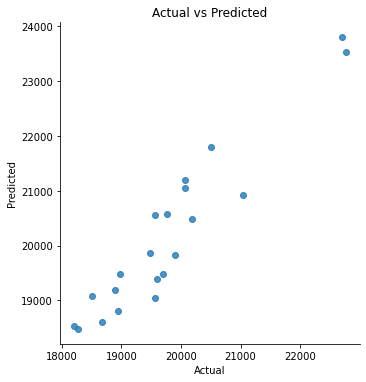

In [106]:
sns.lmplot(x='Actual',y='Predicted',data=df_results,fit_reg=False)
plt.title('Actual vs Predicted')

In [107]:
#Assumption:2 Error terms-Normal

#so we plot the quantile quantile plot

In [108]:
residual= result5.resid

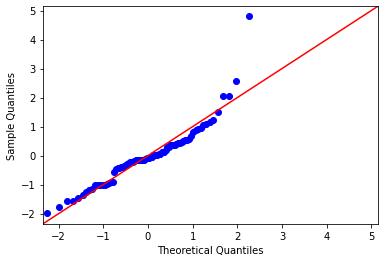

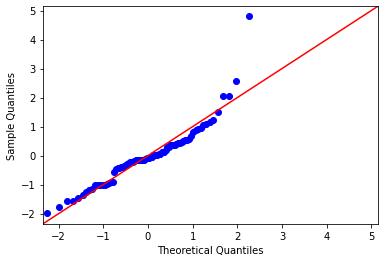

In [111]:
sm.qqplot(residual,fit=True,line='45')

In [112]:
#Assumption:3 no multicollinearity among the features
#VIF varience inflation factor
#captures measure of correlation of the features
#this value must be less than 5

In [113]:
!pip3 install patsy

In [114]:
from patsy import dmatrices

In [128]:
#Y,X = dmatrices('NewVolSales~ Base_Price+InStore+TV+Discount+Stout+Website_Campaign_Website_Campaign',data=data ,return_type='dataframe')

In [115]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [116]:
vif = pd.DataFrame()

In [121]:
#vif['VIF factor'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

# This is the final result

We can directly do this step

But doing all the above steps we can explain all the steps

In [131]:
from sklearn.linear_model import LinearRegression

In [132]:
linreg= LinearRegression().fit(xtrain5,ytrain)

In [133]:
linreg_prediction= linreg.predict(xtest5)

In [134]:
linreg.coef_

array([ 0.00000000e+00, -2.06087191e+03,  3.12636160e+01,  6.46751748e+03,
        3.97555885e+00, -1.70235554e+03, -1.32980665e+03])

In [135]:
mean_absolute_error(ytest,linreg_prediction)

525.3010540801436

In [136]:
mean_squared_error(ytest,linreg_prediction, squared = False)

649.8348089630836

# SGD Regressor

Gradient Decent

In [137]:
from sklearn.linear_model import SGDRegressor 

In [138]:
sgdr = SGDRegressor().fit(xtrain,ytrain)

In [140]:
sgdr.coef_

array([-4.90631089e+09, -4.09113976e+10,  3.36609427e+11,  5.41633958e+11,
        1.73926990e+09,  1.20858936e+11,  8.93794916e+09,  7.41520004e+09,
       -7.42834888e+09,  3.73351435e+10,  4.39181422e+10])

In [141]:
sgdr_pred= sgdr.predict(xtest)

In [142]:
mean_absolute_error(ytest,sgdr_pred)

121290372677999.23

In [143]:
mean_squared_error(ytest,sgdr_pred,squared=False)

124829821310481.16

In [144]:
# If the accuracy of the data is above 90% then it is the case of overfitting

# Regularization

In [145]:
from sklearn.linear_model import Ridge

In [146]:
ridge_reg= Ridge().fit(xtrain5, ytrain)

In [147]:
ridge_reg.coef_

array([    0.        , -1982.89249104,    41.08477852,   211.50329488,
           4.64617218, -1559.68233431, -1108.9982144 ])

In [148]:
ridge_pred = ridge_reg.predict(xtest5)

In [149]:
mean_absolute_error(ytest, ridge_pred)

499.36102463597456

In [150]:
mean_squared_error(ytest, ridge_pred,squared= False)

604.1446126929981

In [161]:
ridge_reg.alpha

1.0

# 

to find for different values of alpha

to find out the model that is best then we apply the following



# Cross value score

In [156]:
from sklearn.model_selection import cross_val_score

In [165]:
lambda_space=[1,0.001,0.1,1.5,10]

#the ideal alpha values are 0 to 0.1

In [163]:
ridge_score=[]
for i in lambda_space:
    val = np.mean(cross_val_score(Ridge(alpha=i), xtrain, ytrain,cv=5))
    ridge_score.append(val)
    
    #here we take cv=5 times the code is run

In [164]:
ridge_score

[0.6170692821812848,
 0.626104832889245,
 0.6152457192399812,
 0.6146827244466995,
 0.4928433200555643]

## Lasso

In [166]:
from sklearn.linear_model import Lasso 

In [167]:
lasso_reg = Lasso().fit(xtrain, ytrain)

In [168]:
lasso_pred = lasso_reg.predict(xtest)

In [169]:
mean_squared_error(ytest, lasso_pred,squared=False)

617.3508409496737

In [170]:
lasso_reg.alpha

1.0

In [186]:
lasso_score=[]
for i in lambda_space:
    val = np.mean(cross_val_score(Lasso(alpha=i), xtrain, ytrain,cv=5))
    lasso_score.append(val)

In [172]:
lasso_score

[0.6170692821812848,
 0.626104832889245,
 0.6152457192399812,
 0.6146827244466995,
 0.4928433200555643]

# Elastic Net

In [173]:
from sklearn.linear_model import ElasticNet

In [174]:
enet = ElasticNet().fit(xtrain,ytrain)

In [175]:
pred = enet.predict(xtest)

In [176]:
mean_squared_error(ytest,pred,squared=False)

951.1623649625636

In [177]:
## li ratio in ElasticNet
## [0 and 1]

In [178]:
enet.l1_ratio

0.5

In [179]:
enet_l1=[0.01,0.05,0.7,1]

In [184]:
enet_score=[]
for i in enet_l1:
    val = np.mean(cross_val_score(ElasticNet(l1_ratio=i), xtrain, ytrain,cv=5))
    enet_score.append(val)

In [185]:
enet_score

[0.18287496581600565,
 0.18855376162819576,
 0.38112603263126904,
 0.6170648287449725]